![houses](images/houses.jpg)
<a href='https://www.freepik.com/vectors/sale'>Sale vector created by pch.vector - www.freepik.com</a>

# Modeling

In this notebook, we iterate through different versions of a regression model to create the most accurate model for predicting home prices. We will use the final model to determine which features are most important to price and if a seller can change any of these features to increase selling price.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#load clean dataset
data = pd.read_csv('data/housing_data_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  float64
 8   view           21596 non-null  float64
 9   condition      21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  float64
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   21596 non-null  float64
 14  zipcode        21596 non-null  int64  
 15  lat            21596 non-null  float64
 16  long           21596 non-null  float64
 17  sqft_living15  21596 non-null  int64  
 18  sqft_l

## Model 1: Baseline

This model will be the baseline for which we base all other models. This model does not take into account categorical variables, outliers, or other data transformations.

In [4]:
# Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [5]:
# drop non-numerical columns like id and date.
y = data['price']
X = data.drop(['price', 'id', 'date'], axis=1)

In [6]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [7]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [8]:
metrics.r2_score(y_train, y_hat_train)

0.6707918326331238

In [9]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2198.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:26:06   Log-Likelihood:            -2.3634e+05
No. Observations:               17276   AIC:                         4.727e+05
Df Residuals:                   17259   BIC:                         4.728e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.36e+06   3.44e+06     -0.686      0.493    -9.1e+06    4.38e+06
bedrooms      -5.052e+04   2296.492    -21.999      0.000    -5.5e+04    -4.6e+04
bathrooms       5.86e+04   3830.862     15.296      0.000    5.11e+04    6.61e+04
sqft_lot          0.1514      0.054      2.811      0.005       0.046       0.257
floors         1.911e+04   4206.690      4.542      0.000    1.09e+04    2.74e+04
waterfront     5.711e+05   2.08e+04     27.402      0.000     5.3e+05    6.12e+05
view           5.996e+04   2479.967     24.176      0.000    5.51e+04    6.48e+04
condition      2.778e+04   2767.952     10.036      0.000    2.24e+04    3.32e+04
sqft_above      249.5904      3.987     62.600      0.000     241.775     257.406
sqft_basement   187.5434      5.057     37.089      0.000     177.632     197.455
yr_built      -2019.8535     82.456    -24.496      0.000   -2181.475   -1858.232
yr_renovated     28.6307      4.660      6.144      0.000      19.497      37.765
zipcode        -659.9187     38.819    -17.000      0.000    -736.008    -583.829
lat            6.836e+05   1.25e+04     54.783      0.000    6.59e+05    7.08e+05
long           -3.14e+05   1.53e+04    -20.581      0.000   -3.44e+05   -2.84e+05
sqft_living15    62.3981      3.906     15.976      0.000      54.742      70.054
sqft_lot15       -0.4891      0.085     -5.722      0.000      -0.657      -0.322
==============================================================================
Omnibus:                    13675.916   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1079376.874
Skew:                           3.241   Prob(JB):                         0.00
Kurtosis:                      41.177   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This initial model has an R-squared value of .67. This means that 67% of the variation in our dependent variable, price, is explained by the independent variables in this model.

Also, all of our features appear to be statistically significant with p-values less than 0.05. It appears waterfront and latitude have the strongest positive effect on price, while longitude and bedrooms have the strongest negative affect. We will definitely need to look into these variables closer and investigate why bedrooms would have a negative affect on price.

Let's also look at the root mean squared error (RMSE) values and see how well our model works on test data.

In [10]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 211378.2182045845
RMSE Test: 206576.069094622


The train dataset's RMSE is relatively close to the test dataset's, with a root mean squared error around 200k. This model seems to be a good starting point.

## Model 2: Dealing with Categorical Variables

Now that we have our baseline model established, let's do some additional tuning of the model to account for categorical variables to potentially increase our R-squared value.

### Preparing the Categorical Data

First, let's return to the histograms for all columns and inspect the distribution of the data and whether or not the variables are continuous or categorical.

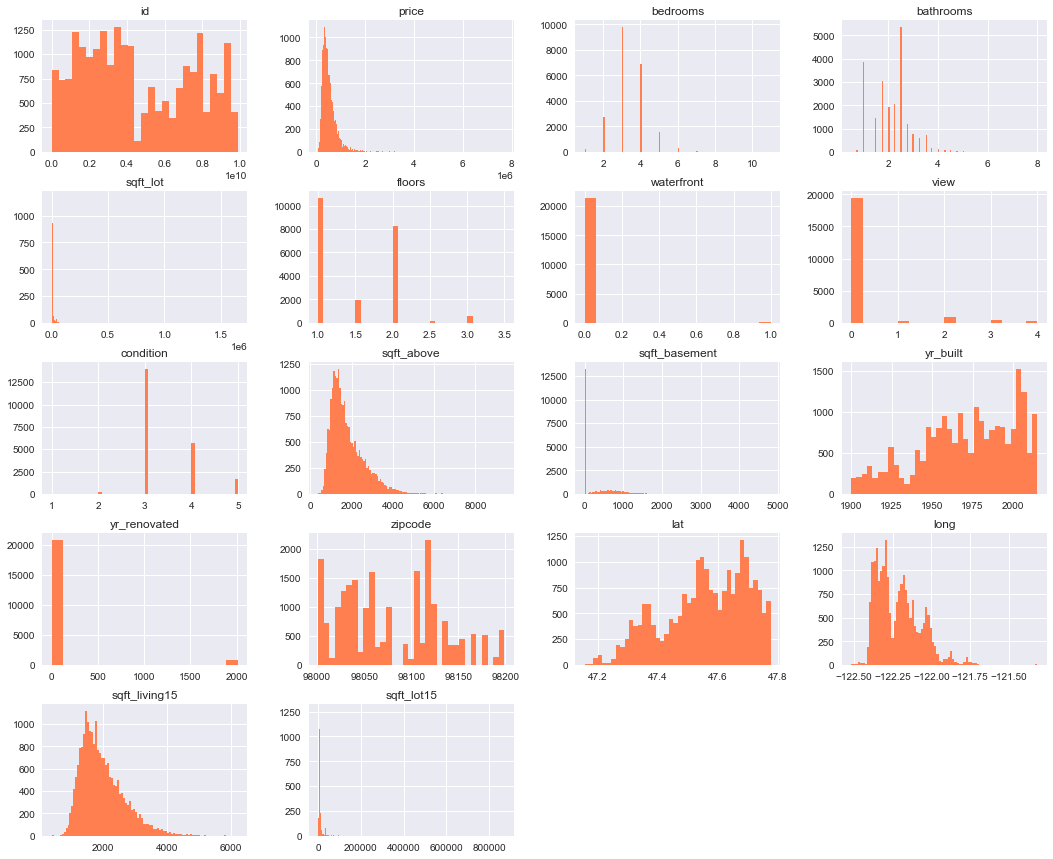

In [11]:
data.hist(figsize=(18,15), bins = 'auto', color='coral');

Based on these histograms, the following columns appear to be categorical:
* bedrooms
* bathrooms
* floors
* waterfront
* view
* condition

This is because these columns have distinct, discrete values for each home. Some of these variables need to be further investigated, but let's address these clearly categorical columns for now.

It appeared in our first model that bedrooms had a negatively correlated relationship with sales price. Since this seems counterintuitive, let's explore this variable further.


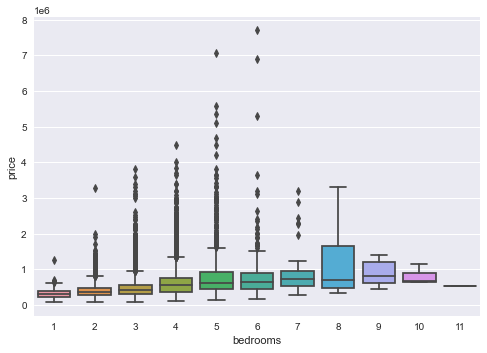

In [12]:
sns.boxplot(x = data.bedrooms, y = data.price);

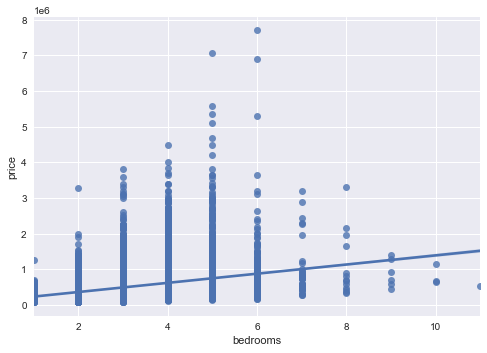

In [13]:
sns.regplot(x="bedrooms", y="price", data=data);

There does seem to be a slightly positive relationship between price and bedrooms, but this relationship doesn't hold as well when bedrooms increases past 5. Binning bedrooms into categories may solve this issue.

Let's now separate these columns into continuous and categorical variables to be handled separately.

In [14]:
conts = []
cats = []
for col in data.columns:
    if data[col].nunique()<30:
        cats.append(col)
    else:
        conts.append(col)

In [15]:
conts

['id',
 'date',
 'price',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [16]:
cats

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

Using a cutoff of unique values less than 30, we get the same resulting categorical columns as when we viewed the histograms for each column.

However, we noticed earlier that zipcodes were included in our dataset. These shouldn't really be considered continuous, as zipcode is a discrete value. Since there are 70 zipcodes in the dataset, let's include our zipcodes as categorical and bin into groups based on number.

In [17]:
conts.remove('zipcode')
cats.append('zipcode')

In [18]:
cats

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode']

Longitude and latitude are also included in the dataset. It could be a good idea to separate these into quadrants--longitude and latitude may be a better indicator of price than zipcode, but we will leave both in our model for now.

In [19]:
# explore lat and long to decide cutoff points for the quadrants

data.lat.describe()

count    21596.000000
mean        47.560087
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [20]:
data.long.describe()

count    21596.000000
mean      -122.213977
std          0.140725
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

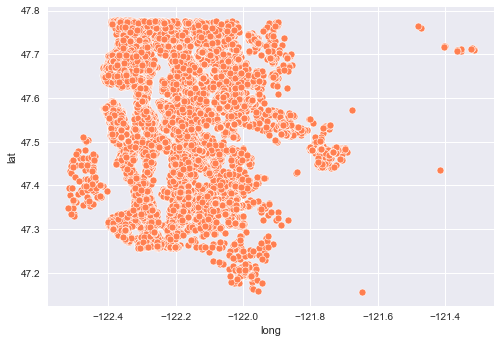

In [21]:
sns.scatterplot(data=data, x="long", y="lat", color="coral");

Let's use 47.5 as our cutoff for latitude and -122.2 for longitude.

In [22]:
# create a formula for determining which quadrant the data falls in.

def quadrant(lat, long):
    if (lat >= 47.5) & (long <=-122.2):
        return 1
    elif (lat >= 47.5) & (long >-122.2):
        return 2
    elif (lat < 47.5) & (long <=-122.2):
        return 3
    else:
        return 4

In [23]:
data['coordinates'] = data.apply(lambda x: list([x['lat'], x['long']]), axis=1)

In [24]:
# create a new column called quadrant that categorizes the location

data['quadrant']= data['coordinates'].apply(lambda x: quadrant(x[0],x[1]))

In [25]:
data.quadrant.value_counts()

1    9220
2    5775
4    3503
3    3098
Name: quadrant, dtype: int64

In [26]:
# add quadrant to our categorical variable list

cats.append('quadrant')


In [27]:
# remove helper column 'coordinates'
data.drop('coordinates', inplace=True, axis=1)

Revisiting the histogram above for 'sqft_basement', it appears any house without a basement has a 'sqft_basement' value of zero. It may make more sense to turn this into a categorical variable, where a value of 1 means there is a basement and 0 means there is not.

In [28]:
data['has_basement'] = np.where(data['sqft_basement']>0,1,0)

### One Hot Encoding Categorical Variables

In [29]:
df_cat = data.loc[:,cats]

In [30]:
df_cat.nunique()

bedrooms      11
bathrooms     29
floors         6
waterfront     2
view           5
condition      5
zipcode       70
quadrant       4
dtype: int64

In [31]:
# Check the range of values for bathrooms to see if binning is appropriate.
df_cat.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Since bathrooms has a large number of categories (20+) let's categorize this bathroom data into bins.

In [32]:
# use cut function to put bathroom data into bins

df_cat['bathrooms'] = pd.cut(df_cat.bathrooms, [0, 1, 2, 3, 4, 5, 6, 8], 
                             labels = ['0_to_1', '1_to_2', '2_to_3', '3_to_4', '4_to_5', '5_to_6', '6_plus'])

In [33]:
df_cat.bathrooms.value_counts()

2_to_3    9362
1_to_2    6431
0_to_1    3926
3_to_4    1611
4_to_5     223
5_to_6      33
6_plus      10
Name: bathrooms, dtype: int64

Bedrooms may also be helpful to bin, since there are 11 categories.

In [34]:
df_cat['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [35]:
df_cat['bedrooms'] = pd.cut(df_cat.bedrooms, [0,1,2,3,4,5,12],
                            labels = ['1','2','3','4','5','6_plus'])

Let's also categorize the zipcode data as we mentioned earlier.


In [36]:
# check the range of values for zipcodes to see the best way to properly bin.
df_cat.groupby(by='zipcode').count()

,bedrooms,bathrooms,floors,waterfront,view,condition,quadrant
zipcode,,,,,,,
98001,361,361,361,361,361,361,361
98002,199,199,199,199,199,199,199
98003,280,280,280,280,280,280,280
98004,317,317,317,317,317,317,317
98005,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...
98177,255,255,255,255,255,255,255
98178,262,262,262,262,262,262,262
98188,136,136,136,136,136,136,136


There are about 200 zipcodes between the first and last zipcodes, so let's separate into 4 groups.

In [37]:
df_cat['zipcode'] = pd.cut(df_cat.zipcode, [98000, 98050, 98100, 98150, 98200],
                                labels = ['98001_to_98050','98051_to_98100', '98101_to_98150', '98150_to_98200'])

In [38]:
# Use a for loop to create a new dataframe of dummy variables
dataset = pd.DataFrame()
for col in df_cat.columns:
    col_dummies = pd.get_dummies(df_cat[col], prefix = str(col)[:5], drop_first=True)
    dataset = pd.concat([dataset, col_dummies], axis=1)

dataset

,bedro_2,bedro_3,bedro_4,bedro_5,bedro_6_plus,bathr_1_to_2,bathr_2_to_3,bathr_3_to_4,bathr_4_to_5,bathr_5_to_6,...,condi_2,condi_3,condi_4,condi_5,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21592,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21593,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21594,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [39]:
# concatenate the original data set with the dummy variable columns
data_model_2 = pd.concat([data, dataset], axis=1)

# drop variables that are now included as dummy variables
data_model_2.drop(columns=cats, inplace=True)

In [40]:
data_model_2.columns

Index(['id', 'date', 'price', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'has_basement', 'bedro_2', 'bedro_3', 'bedro_4',
       'bedro_5', 'bedro_6_plus', 'bathr_1_to_2', 'bathr_2_to_3',
       'bathr_3_to_4', 'bathr_4_to_5', 'bathr_5_to_6', 'bathr_6_plus',
       'floor_1.5', 'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5',
       'water_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condi_2',
       'condi_3', 'condi_4', 'condi_5', 'zipco_98051_to_98100',
       'zipco_98101_to_98150', 'zipco_98150_to_98200', 'quadr_2', 'quadr_3',
       'quadr_4'],
      dtype='object')

In [41]:
# drop variables that we later converted to categorical
data_model_2.drop(columns=['lat', 'long', 'sqft_basement'], inplace=True)

### Run New Model

In [42]:
y = data_model_2['price']
X = data_model_2.drop(['price', 'id', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [43]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_hat_train = model_2.predict(X_train)
y_hat_test = model_2.predict(X_test)

In [44]:
metrics.r2_score(y_train, y_hat_train)

0.7043320241482438

Our R-squared score has improved from .67 to .7. Let's also look at the model summary and see if any insights can be gained to further improve the model. We'll also check if the RMSE improved.

In [45]:
X_int = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:26:30   Log-Likelihood:            -2.3562e+05
No. Observations:               17276   AIC:                         4.713e+05
Df Residuals:                   17237   BIC:                         4.716e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.196e+06   1.83e+05     11.966      0.000    1.84e+06    2.56e+06
sqft_lot                 0.1782      0.055      3.219      0.001       0.070       0.287
sqft_above             221.4292      4.043     54.769      0.000     213.505     229.354
yr_built             -1153.1352     91.534    -12.598      0.000   -1332.551    -973.719
yr_renovated            37.4787      4.575      8.191      0.000      28.510      46.447
sqft_living15          102.8563      3.835     26.820      0.000      95.339     110.373
sqft_lot15              -0.4028      0.085     -4.720      0.000      -0.570      -0.236
has_basement          9.997e+04   4198.339     23.811      0.000    9.17e+04    1.08e+05
bedro_2               1.554e+04   1.68e+04      0.925      0.355   -1.74e+04    4.85e+04
bedro_3              -6160.8053   1.67e+04     -0.368      0.713    -3.9e+04    2.66e+04
bedro_4              -3.256e+04   1.71e+04     -1.902      0.057   -6.61e+04     986.914
bedro_5              -4.615e+04    1.8e+04     -2.564      0.010   -8.14e+04   -1.09e+04
bedro_6_plus         -1.055e+05   2.12e+04     -4.979      0.000   -1.47e+05   -6.39e+04
bathr_1_to_2          7446.1055   5333.711      1.396      0.163   -3008.509    1.79e+04
bathr_2_to_3          2.323e+04   6775.268      3.429      0.001    9950.274    3.65e+04
bathr_3_to_4          1.411e+05   1.02e+04     13.830      0.000    1.21e+05    1.61e+05
bathr_4_to_5          3.748e+05   1.85e+04     20.229      0.000    3.38e+05    4.11e+05
bathr_5_to_6          8.921e+05   4.15e+04     21.514      0.000    8.11e+05    9.73e+05
bathr_6_plus          1.317e+06   6.75e+04     19.525      0.000    1.18e+06    1.45e+06
floor_1.5            -2.013e+04   6206.166     -3.244      0.001   -3.23e+04   -7967.707
floor_2.0            -3.504e+04   5140.188     -6.818      0.000   -4.51e+04    -2.5e+04
floor_2.5             1.296e+05   1.88e+04      6.900      0.000    9.28e+04    1.66e+05
floor_3.0             3.602e+04   1.12e+04      3.217      0.001    1.41e+04     5.8e+04
floor_3.5             2.782e+05   9.11e+04      3.056      0.002    9.98e+04    4.57e+05
water_1.0             5.871e+05   2.26e+04     25.938      0.000    5.43e+05    6.31e+05
view_1.0              9.304e+04   1.31e+04      7.128      0.000    6.75e+04    1.19e+05
view_2.0              7.152e+04   7692.855      9.297      0.000    5.64e+04    8.66e+04
view_3.0               1.52e+05   1.07e+04     14.240      0.000    1.31e+05    1.73e+05
view_4.0              3.316e+05   1.55e+04     21.326      0.000    3.01e+05    3.62e+05
condi_2                8.55e+04   4.68e+04      1.826      0.068   -6285.264    1.77e+05
condi_3               1.003e+05   4.35e+04      2.305      0.021     1.5e+04    1.86e+05
condi_4               1.445e+05   4.35e+04      3.321    

In [46]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 202683.2122704163
RMSE Test: 189802.41396018508


Our RMSE has also slightly improved.

Looking at p-values in the table, it looks like not all of our features are statistically significant using a p-value cut off of 0.05. We are still seeing negative coefficients as the number of bedrooms increase, however, it now appears some of these features are below our level of significance. Interestingly, bathrooms do have a significant relationship with price in the positive direction, which makes more sense. The location of the home as it relates to quadrants also seems to be important.

Let's remove some of these features with p-values above 0.05 to simplify our model.

## Model 3: Remove Statistically Insignificant Features

### Drop Insignificant Features Using Stepwise Function

Let's use a stepwise selection function to choose columns only with p-values less than 0.05.

In [47]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [48]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: 

<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-47-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['bathr_4_to_5', 'sqft_living15', 'water_1.0', 'sqft_above', 'has_basement', 'quadr_4', 'quadr_3', 'quadr_2', 'yr_built', 'view_4.0', 'bathr_5_to_6', 'bathr_6_plus', 'bathr_3_to_4', 'view_3.0', 'zipco_98051_to_98100', 'view_2.0', 'yr_renovated', 'floor_2.0', 'zipco_98150_to_98200', 'view_1.0', 'zipco_98101_to_98150', 'floor_2.5', 'condi_5', 'bedro_6_plus', 'bedro_4', 'bedro_5', 'condi_4', 'floor_3.0', 'bedro_2', 'sqft_lot15', 'bathr_2_to_3', 'floor_1.5', 'sqft_lot', 'floor_3.5']


In [49]:
new_x_cols

['bathr_4_to_5',
 'sqft_living15',
 'water_1.0',
 'sqft_above',
 'has_basement',
 'quadr_4',
 'quadr_3',
 'quadr_2',
 'yr_built',
 'view_4.0',
 'bathr_5_to_6',
 'bathr_6_plus',
 'bathr_3_to_4',
 'view_3.0',
 'zipco_98051_to_98100',
 'view_2.0',
 'yr_renovated',
 'floor_2.0',
 'zipco_98150_to_98200',
 'view_1.0',
 'zipco_98101_to_98150',
 'floor_2.5',
 'condi_5',
 'bedro_6_plus',
 'bedro_4',
 'bedro_5',
 'condi_4',
 'floor_3.0',
 'bedro_2',
 'sqft_lot15',
 'bathr_2_to_3',
 'floor_1.5',
 'sqft_lot',
 'floor_3.5']

In [50]:
# see how many columns were dropped using stepwise selection
print(len(X.columns), len(new_x_cols))

38 34


### Run New Model

In [51]:
data_model_3 = data_model_2.copy()

In [52]:
y = data_model_3['price']
X = data_model_3[new_x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [53]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_hat_train = model_3.predict(X_train)
y_hat_test = model_3.predict(X_test)

In [54]:
metrics.r2_score(y_train, y_hat_train)

0.7018930581312065

In [55]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 200750.74996909892
RMSE Test: 198154.43172640202


In [56]:
# Perform cross validation
from sklearn.metrics import mean_squared_error, make_scorer
mse = make_scorer(mean_squared_error)

cv_20_results = cross_val_score(model_3, X,y, cv=20, scoring=mse)
np.mean(np.sqrt(cv_20_results))

201323.01149955118

Our Rsquared value and root mean squared error values stayed nearly even with our previous model. Since this version of the model has been simplified to use fewer insignificant features without losing accuracy, we will proceed with this version of the model.

Now is a good time to check if our assumptions for linear regression are in place.

### Check Normality Assumption

In [57]:
X_int = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_int).fit()

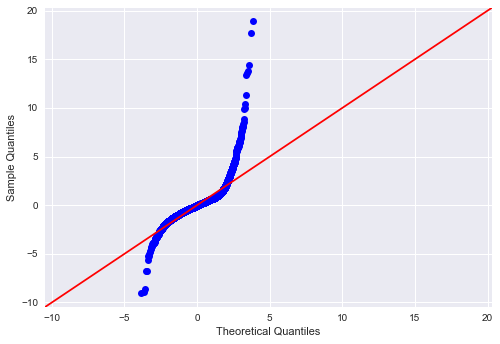

In [58]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

According to this QQ plot, it appears the residual normality assumption is violated at both tails of the data.

### Check Homoscedasticity Assumption

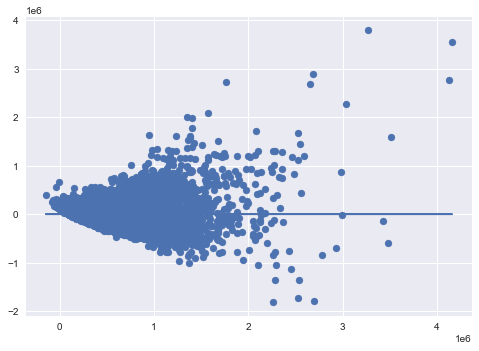

In [59]:
plt.scatter(model_3.predict(X_int), model_3.resid)
plt.plot(model_3.predict(X_int), [0 for i in range(len(X_int))]);

It also looks like homoscedasticity is being violated, as there is a clear cone shape in the scatter plot of the residuals. Let's remove outliers and see if it helps our data meet these assumptions.

## Model 4: Remove Outliers

In [60]:
# remove unnecessary columns dropped in our last model
del_x_cols = []
for col in data_model_3.columns:
    if col not in new_x_cols:
        del_x_cols.append(col)

In [61]:
del_x_cols

['id', 'date', 'price', 'bedro_3', 'bathr_1_to_2', 'condi_2', 'condi_3']

In [62]:
# do not included price in the columns deleted from the model
del_x_cols.remove('price')

In [63]:
data_model_3.drop(del_x_cols, axis=1, inplace=True)

### Explore Distribution of Data

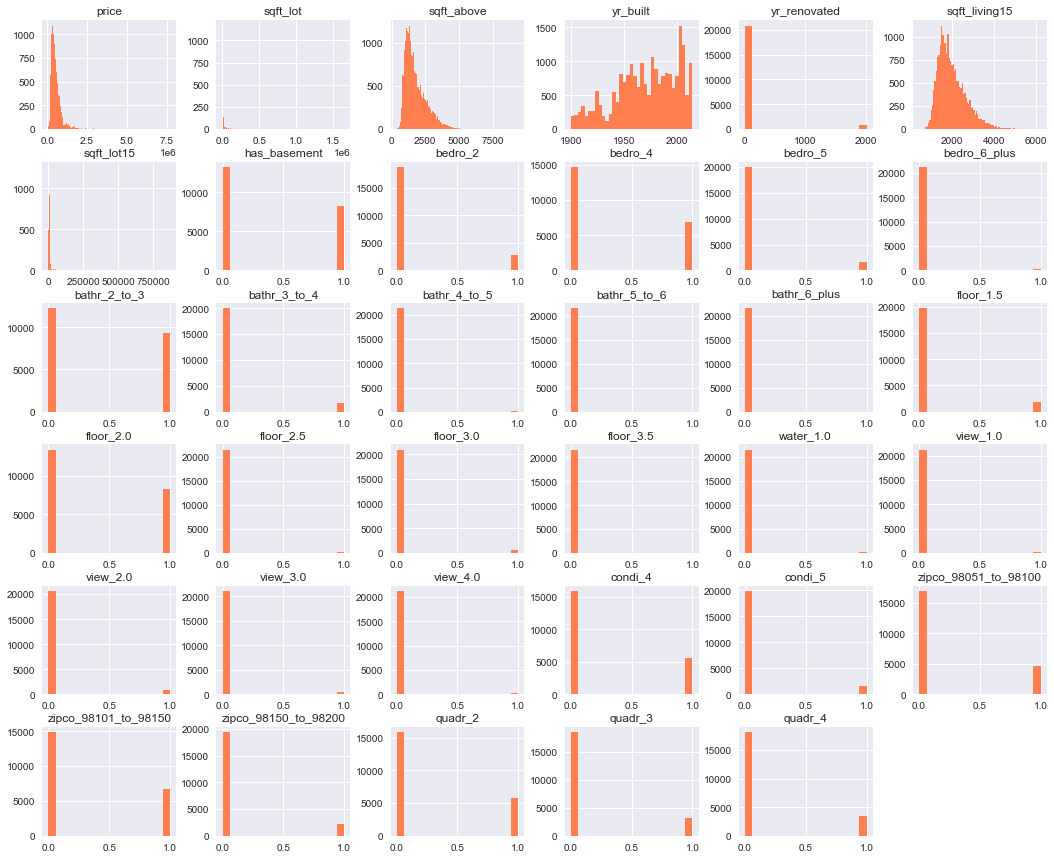

In [64]:
data_model_3.hist(figsize=(18,15), bins = 'auto', color='coral');

It looks like there are a number of outliers in some of our independent variables and our dependent variable, price. Let's take a closer look at price, since often removing outliers in the dependent variable can eliminate outliers in other variables.

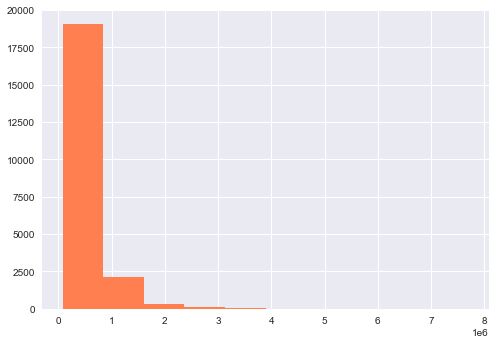

In [65]:
data_model_3.price.hist(color='coral');

<AxesSubplot:xlabel='price'>

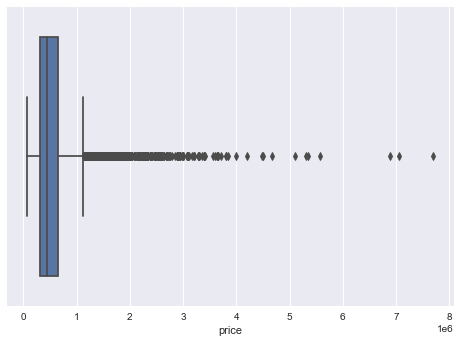

In [66]:
sns.boxplot(x=data_model_3['price'])

It looks like it might be a good idea to remove any homes above 2 million dollars in price. Since ABC agency's clients are younger, price-sensitive individuals unlikely to own homes above $2 million, it seems reasonable to eliminate these outliers. Before removing these outliers, let's check if using Z-score to eliminate outliers is a good strategy.

### Remove Price Outliers based on Z-Score

In [67]:
z = np.abs(stats.zscore(data_model_3.price))
z

array([0.86668512, 0.00623887, 0.98073984, ..., 0.37616542, 0.38188449,
       0.58603973])

In [68]:
data_model_4a = data_model_3[(z<3)]

In [69]:
data_model_4a.shape

(21190, 35)

<AxesSubplot:>

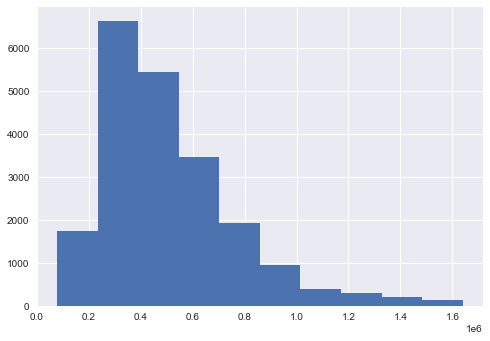

In [70]:
data_model_4a.price.hist()

It looks like removing outliers using z-score achieved our goal of eliminating price under 2 million. Let's run a new model and check if losing this data affected the model's accuracy.

In [71]:
y = data_model_4a['price']
X = data_model_4a.drop(['price'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
model_4a = LinearRegression()
model_4a.fit(X_train, y_train)
y_hat_train = model_4a.predict(X_train)
y_hat_test = model_4a.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6930229157330343

In [73]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 143746.9570018191
RMSE Test: 143018.83160745114


In [74]:
data_model_4a.shape[0]-data_model_3.shape[0]

-406

It looks like we lost about 400 values by eliminating outliers using z-score. Our model also lost some accuracy, dropping to an Rsquared value of .69. Our RMSE, however, decreased significantly. Let's check if removing outliers a different way returns a better model.

### Aternate Aproach: Remove Outliers Based on Price Cutoff

In [75]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data_model_3.price.quantile(q=q)))

0.8 percentile: 700500.0
0.81 percentile: 718000.0
0.82 percentile: 730000.8999999999
0.83 percentile: 749950.0
0.84 percentile: 760004.0
0.85 percentile: 779807.5
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836799.9999999993
0.89 percentile: 859972.0
0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [76]:
orig_tot = len(data_model_3)
data_model_4b = data_model_3[data_model_3.price < 2000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data_model_4b))/orig_tot)

Percent removed: 0.009631413224671235


<AxesSubplot:>

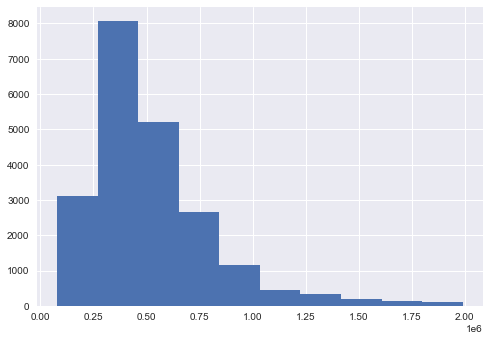

In [77]:
data_model_4b.price.hist()

In [78]:
# Refit model with subset features
y = data_model_4b['price']
X = data_model_4b.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

model_4b = LinearRegression()
model_4b.fit(X_train, y_train)
y_hat_train = model_4b.predict(X_train)
y_hat_test = model_4b.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.7024546068840238

In [79]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 156989.60356603545
RMSE Test: 156731.2898559558


In [80]:
data_model_4b.shape[0]-data_model_3.shape[0]

-208

Removing outliers in this way gave us a slightly better R squared value than removing outliers by using z-score. Our RMSE also improved over model 3. We were able to preserve about 200 more values in this method, so let's use this model going forward.

### Recheck Normality and Homoscedasticity Assumptions

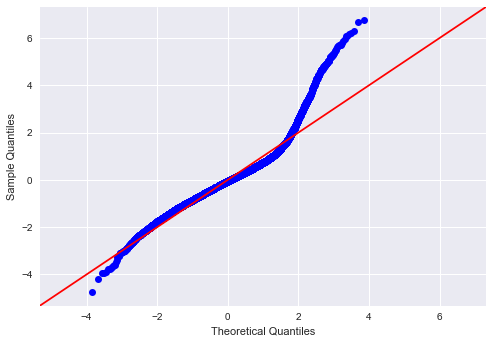

In [81]:
X_int = sm.add_constant(X_train)
model_4b = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_4b.resid, dist=stats.norm, line='45', fit=True)

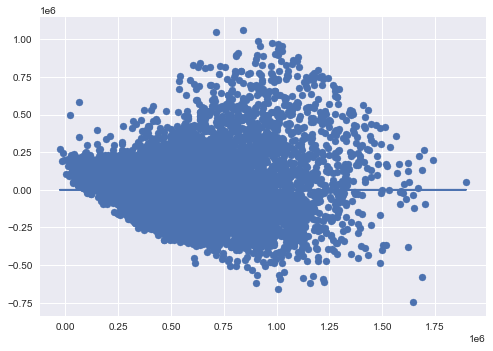

In [82]:
plt.scatter(model_4b.predict(X_int), model_4b.resid)
plt.plot(model_4b.predict(X_int), [0 for i in range(len(X_int))])

The normality of the residuals has improved, but it looks like the assumption is still being violated. Homoscedasticity has also improved, but we still have a slight cone shape. We may need to try transforming our data in order to improve our model further. Before doing that, though, let's check our variables for multicollinearity.

## Model 5: Adjust for Multicollinearity

### Investigate Pairwise Correlation

In [83]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_pairs=data_model_4b.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [84]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,


We can confirm there is no pairwise correlation present.

### Investigate multicollinearity

In [85]:
# Use VIF scores to determine whether a column exhibits multicollinearity

X = data_model_4b.drop(['price'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_lot', 2.3520260946816336),
 ('sqft_above', 26.798053500094824),
 ('yr_built', 32.59326954893151),
 ('yr_renovated', 1.0648022774583203),
 ('sqft_living15', 27.309313117497698),
 ('sqft_lot15', 2.557560715762715),
 ('has_basement', 2.609962084651896),
 ('bedro_2', 1.4472233655109707),
 ('bedro_4', 2.080151489922795),
 ('bedro_5', 1.3523396054511112),
 ('bedro_6_plus', 1.1257396226202225),
 ('bathr_2_to_3', 3.784434433261295),
 ('bathr_3_to_4', 2.0464498799180326),
 ('bathr_4_to_5', 1.2405879073536417),
 ('bathr_5_to_6', 1.0512201255861977),
 ('bathr_6_plus', 1.0182653729887992),
 ('floor_1.5', 1.3401759617345583),
 ('floor_2.0', 3.925152817052293),
 ('floor_2.5', 1.0644857470145421),
 ('floor_3.0', 1.3282680893651435),
 ('floor_3.5', 1.004984492535364),
 ('water_1.0', 1.3983610165107383),
 ('view_1.0', 1.0469017331723403),
 ('view_2.0', 1.1103634699366323),
 ('view_3.0', 1.0984932587353748),
 ('view_4.0', 1.4415156962832816),
 ('condi_4', 1.57746101843817),
 ('condi_5', 1.193834

In [86]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['sqft_above', 'yr_built', 'sqft_living15']

It looks like three of our columns have VIF scores greater than 10, suggesting multicollinearity in these columns. We will run different versions of the model and see if we can maintain accuracy without one or all of these columns.

In [87]:
# create function to quickly check r-squared values when dropping different columns.
def r2_calc(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    return metrics.r2_score(y_train, y_hat_train)

### Check Columns to Drop and Run New Model

In [88]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_above','yr_built','sqft_living15'],axis=1)
r2_calc(X,y)

0.5488138199906489

Dropping all of the multicollinear columns leads to too much loss of accuracy in our model. Let's check our R-squared value when dropping one of each column.

In [89]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_above'],axis=1)
r2_calc(X,y)

0.6484772987656998

In [90]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'yr_built'],axis=1)
r2_calc(X,y)

0.6944989270824107

In [91]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_living15'],axis=1)
r2_calc(X,y)

0.681704181403082

In [92]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_living15', 'yr_built'],axis=1)
r2_calc(X,y)

0.6781458259751353

It appears dropping the 'yr_built' column produces the strongest results for our model. Let's drop this column for our 5th model to decrease our multicollinearity.

In [93]:
data_model_5 = data_model_4b.drop(['yr_built'], axis=1)
y = data_model_5['price']
X = data_model_5.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
y_hat_train = model_5.predict(X_train)
y_hat_test = model_5.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6974875716826215

In [94]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 156750.32358819112
RMSE Test: 162287.21724229452


In [95]:
# Perform cross validation
cv_20_results = cross_val_score(model_5, X,y, cv=20, scoring=mse)
np.mean(np.sqrt(cv_20_results))

158135.21361879917

Our RMSE increased slightly but is still much improved from earlier models.

In [96]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1193.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:27:16   Log-Likelihood:            -2.2895e+05
No. Observations:               17110   AIC:                         4.580e+05
Df Residuals:                   17076   BIC:                         4.582e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.904e+04   6845.139      7.165      0.000    3.56e+04    6.25e+04
sqft_lot                 0.2067      0.041      5.036      0.000       0.126       0.287
sqft_above             175.5036      3.218     54.535      0.000     169.196     181.812
yr_renovated            48.2889      3.415     14.142      0.000      41.596      54.982
sqft_living15           97.7746      3.021     32.362      0.000      91.853     103.697
sqft_lot15              -0.2275      0.065     -3.523      0.000      -0.354      -0.101
has_basement           8.42e+04   3128.679     26.913      0.000    7.81e+04    9.03e+04
bedro_2               1.706e+04   4022.985      4.240      0.000    9173.792    2.49e+04
bedro_4              -8495.1149   3066.266     -2.771      0.006   -1.45e+04   -2484.918
bedro_5              -1.879e+04   5185.995     -3.624      0.000    -2.9e+04   -8628.046
bedro_6_plus         -7.253e+04   1.06e+04     -6.837      0.000   -9.33e+04   -5.17e+04
bathr_2_to_3          1.432e+04   3527.009      4.061      0.000    7410.316    2.12e+04
bathr_3_to_4          1.088e+05   6427.701     16.930      0.000    9.62e+04    1.21e+05
bathr_4_to_5          1.587e+05   1.48e+04     10.753      0.000     1.3e+05    1.88e+05
bathr_5_to_6          8.797e+04   4.14e+04      2.124      0.034    6797.134    1.69e+05
bathr_6_plus         -1.306e+05   9.16e+04     -1.426      0.154    -3.1e+05     4.9e+04
floor_1.5              1.32e+04   4655.592      2.835      0.005    4074.070    2.23e+04
floor_2.0            -2.922e+04   3844.941     -7.600      0.000   -3.68e+04   -2.17e+04
floor_2.5             5.934e+04   1.56e+04      3.805      0.000    2.88e+04    8.99e+04
floor_3.0             1.445e+04   8258.107      1.750      0.080   -1731.765    3.06e+04
floor_3.5              1.93e+04   7.86e+04      0.246      0.806   -1.35e+05    1.73e+05
water_1.0             2.717e+05   2.14e+04     12.686      0.000     2.3e+05    3.14e+05
view_1.0              8.154e+04   1.03e+04      7.894      0.000    6.13e+04    1.02e+05
view_2.0              6.761e+04   6070.081     11.139      0.000    5.57e+04    7.95e+04
view_3.0              1.532e+05   8354.988     18.331      0.000    1.37e+05     1.7e+05
view_4.0              2.641e+05   1.33e+04     19.867      0.000    2.38e+05     2.9e+05
condi_4               5.161e+04   2959.968     17.435      0.000    4.58e+04    5.74e+04
condi_5                1.05e+05   4641.332     22.628      0.000    9.59e+04    1.14e+05
zipco_98051_to_98100 -4.116e+04   3495.187    -11.777      0.000    -4.8e+04   -3.43e+04
zipco_98101_to_98150  1244.3073   4911.144      0.253      0.800   -8382.041    1.09e+04
zipco_98150_to_98200 -3.286e+04   5002.864     -6.568      0.000   -4.27e+04   -2.31e+04
quadr_2              -6.526e+04   5016.195    -13.010    

Our model lost a minimal amount of accuracy by removing the 'yr_built' column, but our multicollinearity did decrease. For the sake of having a more accurate model, we are going to proceed with this version of the model and leave in the other multicollinear columns, 'sqft_above' and sqft_living_15'. 

## Model 6: Log Transform Variables

Let's go back and check our assumptions of linear regression again.

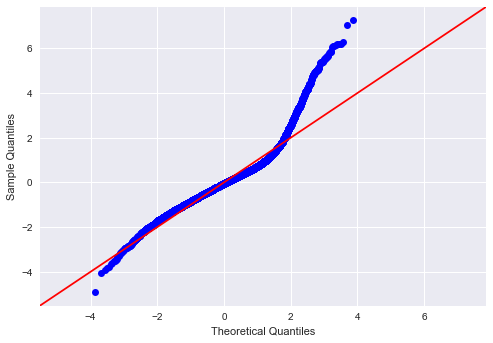

In [97]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

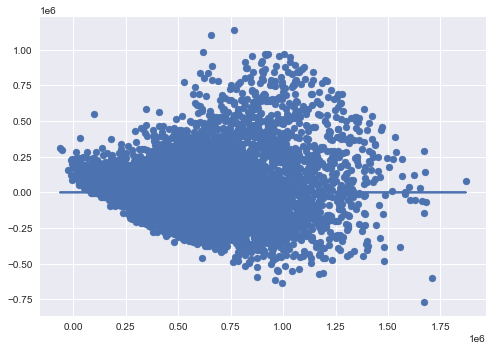

In [98]:
plt.scatter(model_5.predict(X_int), model_5.resid)
plt.plot(model_5.predict(X_int), [0 for i in range(len(X_int))])

We clearly still have some violations of our residual normality and homoscedasticity assumptions. A log transformation may be necessary in this case. Since non-normality of the residuals is the problem with this model, let's log transform our dependent variable.

In [99]:
data_model_6 = data_model_5.copy()

In [100]:
data_model_6['price_log'] = np.log(data_model_6['price'])

<AxesSubplot:>

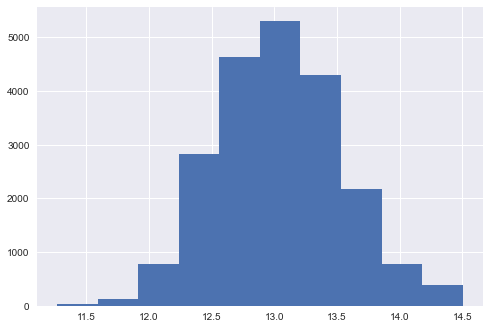

In [101]:
data_model_6.price_log.hist()

In [102]:
y = data_model_6['price_log']
X = data_model_6.drop(['price', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_6 = LinearRegression()
model_6.fit(X_train, y_train_log)
y_hat_train_log = model_6.predict(X_train)
y_hat_test_log = model_6.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7384629254211739

This looks much better! Let's check our RMSE values. We will need to inverse transform our residuals in order to interpret our error correctly.

In [103]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train_log, y_hat_train_log)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test_log, y_hat_test_log)))

RMSE Train: 0.25537642348252104
RMSE Test: 0.2611051698994695


In [104]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 159508.90549190796
RMSE Test: 166728.85001795844


In [105]:
X_int = sm.add_constant(X_train)
model_6 = sm.OLS(y_train_log, X_int).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1461.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:27:17   Log-Likelihood:                -922.60
No. Observations:               17110   AIC:                             1913.
Df Residuals:                   17076   BIC:                             2177.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1861      0.011   1092.722      0.000      12.164      12.208
sqft_lot              5.304e-07   6.69e-08      7.933      0.000    3.99e-07    6.61e-07
sqft_above               0.0003   5.24e-06     54.041      0.000       0.000       0.000
yr_renovated          7.384e-05   5.56e-06     13.274      0.000    6.29e-05    8.47e-05
sqft_living15            0.0002   4.92e-06     34.427      0.000       0.000       0.000
sqft_lot15           -1.232e-07   1.05e-07     -1.171      0.242   -3.29e-07     8.3e-08
has_basement             0.1771      0.005     34.742      0.000       0.167       0.187
bedro_2                 -0.0082      0.007     -1.258      0.209      -0.021       0.005
bedro_4                 -0.0032      0.005     -0.634      0.526      -0.013       0.007
bedro_5                 -0.0305      0.008     -3.607      0.000      -0.047      -0.014
bedro_6_plus            -0.0722      0.017     -4.178      0.000      -0.106      -0.038
bathr_2_to_3             0.0626      0.006     10.887      0.000       0.051       0.074
bathr_3_to_4             0.0906      0.010      8.655      0.000       0.070       0.111
bathr_4_to_5             0.0389      0.024      1.620      0.105      -0.008       0.086
bathr_5_to_6            -0.1668      0.067     -2.472      0.013      -0.299      -0.035
bathr_6_plus            -0.2602      0.149     -1.743      0.081      -0.553       0.032
floor_1.5                0.0523      0.008      6.894      0.000       0.037       0.067
floor_2.0               -0.0105      0.006     -1.671      0.095      -0.023       0.002
floor_2.5                0.0734      0.025      2.890      0.004       0.024       0.123
floor_3.0                0.0723      0.013      5.376      0.000       0.046       0.099
floor_3.5                0.1439      0.128      1.123      0.261      -0.107       0.395
water_1.0                0.4204      0.035     12.046      0.000       0.352       0.489
view_1.0                 0.1499      0.017      8.907      0.000       0.117       0.183
view_2.0                 0.1223      0.010     12.364      0.000       0.103       0.142
view_3.0                 0.1909      0.014     14.023      0.000       0.164       0.218
view_4.0                 0.2927      0.022     13.518      0.000       0.250       0.335
condi_4                  0.0934      0.005     19.358      0.000       0.084       0.103
condi_5                  0.1704      0.008     22.533      0.000       0.156       0.185
zipco_98051_to_98100    -0.0346      0.006     -6.071      0.000      -0.046      -0.023
zipco_98101_to_98150     0.0641      0.008      8.017      0.000       0.048       0.080
zipco_98150_to_98200    -0.0206      0.008     -2.531      0.011      -0.037      -0.005
quadr_2                 -0.0512      0.008     -6.271    

This model has both a high R2 and lower RMSE. Before finalizing our model, let's remove any variables with p-values below 0.05, and check our assumptions one last time.

In [106]:
cols_to_drop = ['sqft_lot15', 'bedro_2', 'bedro_4', 'bathr_4_to_5', 'bathr_6_plus', 'floor_2.0','floor_3.5']

In [107]:
data_model_6b = data_model_6.drop(cols_to_drop, axis=1)

In [108]:
y = data_model_6b['price_log']
X = data_model_6b.drop(['price', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_final = LinearRegression()
model_final.fit(X_train, y_train_log)
y_hat_train_log = model_final.predict(X_train)
y_hat_test_log = model_final.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7382674402569489

In [109]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 159560.6764230314
RMSE Test: 166875.79816493497


In [110]:
X_int = sm.add_constant(X_train)
model_final_ols = sm.OLS(y_train_log, X_int).fit()
model_final_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1853.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:27:17   Log-Likelihood:                -929.00
No. Observations:               17110   AIC:                             1912.
Df Residuals:                   17083   BIC:                             2121.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1824      0.011   1136.755      0.000      12.161      12.203
sqft_lot              4.836e-07   4.95e-08      9.772      0.000    3.87e-07    5.81e-07
sqft_above               0.0003   4.52e-06     62.483      0.000       0.000       0.000
yr_renovated          7.406e-05   5.56e-06     13.314      0.000    6.32e-05     8.5e-05
sqft_living15            0.0002   4.88e-06     34.752      0.000       0.000       0.000
has_basement             0.1800      0.005     37.381      0.000       0.171       0.189
bedro_5                 -0.0263      0.008     -3.330      0.001      -0.042      -0.011
bedro_6_plus            -0.0679      0.017     -4.058      0.000      -0.101      -0.035
bathr_2_to_3             0.0576      0.005     11.623      0.000       0.048       0.067
bathr_3_to_4             0.0833      0.010      8.608      0.000       0.064       0.102
bathr_5_to_6            -0.1735      0.067     -2.583      0.010      -0.305      -0.042
floor_1.5                0.0557      0.007      7.701      0.000       0.042       0.070
floor_2.5                0.0822      0.025      3.287      0.001       0.033       0.131
floor_3.0                0.0819      0.013      6.507      0.000       0.057       0.107
water_1.0                0.4177      0.035     11.982      0.000       0.349       0.486
view_1.0                 0.1499      0.017      8.913      0.000       0.117       0.183
view_2.0                 0.1222      0.010     12.358      0.000       0.103       0.142
view_3.0                 0.1914      0.014     14.074      0.000       0.165       0.218
view_4.0                 0.2936      0.022     13.563      0.000       0.251       0.336
condi_4                  0.0945      0.005     19.938      0.000       0.085       0.104
condi_5                  0.1718      0.007     22.926      0.000       0.157       0.187
zipco_98051_to_98100    -0.0351      0.006     -6.180      0.000      -0.046      -0.024
zipco_98101_to_98150     0.0616      0.008      7.796      0.000       0.046       0.077
zipco_98150_to_98200    -0.0215      0.008     -2.646      0.008      -0.037      -0.006
quadr_2                 -0.0517      0.008     -6.334      0.000      -0.068      -0.036
quadr_3                 -0.5375      0.008    -70.909      0.000      -0.552      -0.523
quadr_4                 -0.4647      0.009    -53.895      0.000      -0.482      -0.448
==============================================================================
Omnibus:                      432.395   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              924.905
Skew:                          -0.134   Prob(JB):                    1.44e-201
Kurtosis:                       4.107   Cond. No.                     1.51e+06
==================

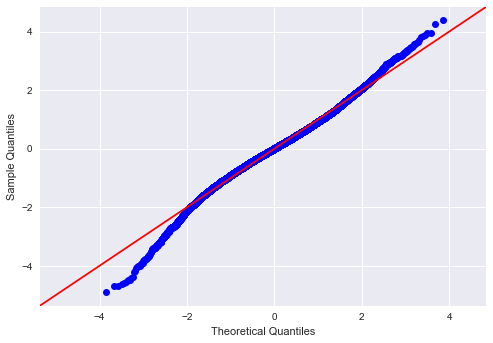

In [111]:
fig = sm.graphics.qqplot(model_final_ols.resid, dist=stats.norm, line='45', fit=True)

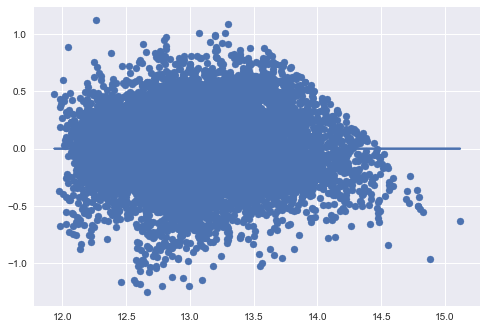

In [112]:
plt.scatter(model_final_ols.predict(X_int), model_final_ols.resid)
plt.plot(model_final_ols.predict(X_int), [0 for i in range(len(X_int))])

Normality and homoscedasticity have improved enough that we are going to accept this model as final.

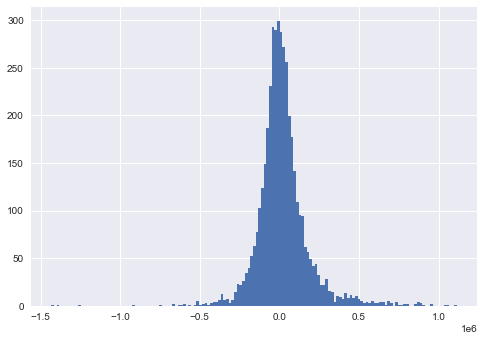

In [113]:
plt.hist(y_test - y_hat_test, bins='auto');

Our residuals look normally distributed, which is encouraging that our model meets the residual normality assumption.

# Evaluation - Final Model Interpretation

First, let's print the coefficients of our final model, and transform them to be interpretted correctly, taking into account the dependent variable log transformation.

In [114]:
# Save model data as final version
data_model_final = data_model_6b.copy()

In [115]:
model_final.coef_

array([ 4.83598069e-07,  2.82158114e-04,  7.40603635e-05,  1.69737572e-04,
        1.79990636e-01, -2.62719469e-02, -6.79041296e-02,  5.76386234e-02,
        8.32611053e-02, -1.73510186e-01,  5.57319610e-02,  8.21569217e-02,
        8.19459231e-02,  4.17742728e-01,  1.49939899e-01,  1.22152078e-01,
        1.91439091e-01,  2.93581663e-01,  9.45395953e-02,  1.71811474e-01,
       -3.51298283e-02,  6.16088605e-02, -2.15225642e-02, -5.17291094e-02,
       -5.37481134e-01, -4.64735326e-01])

In [116]:
# to easily interpret % change in dependent variable - exponentiate the coefficient, subtract one, and multiply by 100
model_final.transformed_coef = (np.exp(model_final.coef_)-1)*100

In [117]:
# put transformed coefficients into a dataframe for easier manipulation
coeff_df = pd.DataFrame(model_final.transformed_coef, X.columns, columns = ['Coeff'])

In [118]:
coeff_df

,Coeff
sqft_lot,0.000048
sqft_above,0.028220
yr_renovated,0.007406
sqft_living15,0.016975
has_basement,19.720615
bedro_5,-2.592984
bedro_6_plus,-6.564995
bathr_2_to_3,5.933211
bathr_3_to_4,8.682555
bathr_5_to_6,-15.929141


In [119]:
coeff_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, sqft_lot to quadr_4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Coeff   26 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [120]:
coeff_top_10 = coeff_df.sort_values('Coeff', ascending=False, axis=0).head(10)

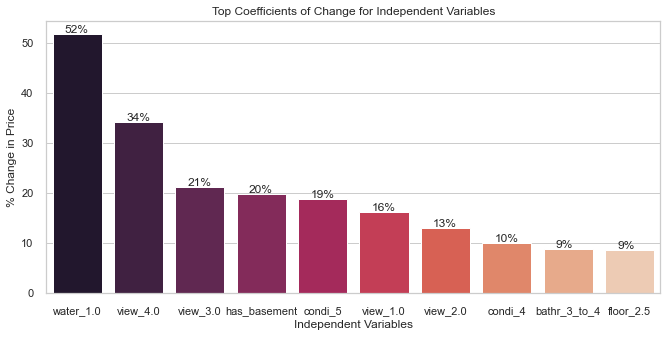

In [121]:
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.figure(figsize=(11,5))
ax = sns.barplot(x = coeff_top_10.index, y = coeff_top_10['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Top Coefficients of Change for Independent Variables')
ax.set(xlabel='Independent Variables', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/4),
            y = height+.25,
            s = '{:.0f}%'.format(height)) 
plt.savefig('images/top_coefficents.png')

## Conclusions

**Houses with more views have higher prices.** Our 'view' variable that was converted into dummy variables represents how many times a house on the market was viewed. As the number of times a house is viewed increases from 0 to 4, the price of the house increases by 34%. This seems logical, as the more times a house is viewed, the more likely there is to be competition among buyers, driving a higher price. The seller could try to increase views by increasing the number of open houses held, which in turn could increase price.

In [122]:
views = coeff_df.loc[['view_4.0', 'view_3.0', 'view_2.0', 'view_1.0']]

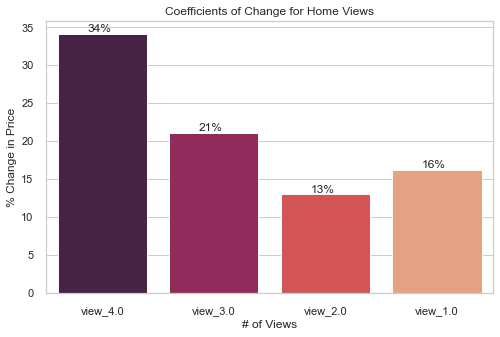

In [123]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = views.index, y = views['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Home Views')
ax.set(xlabel='# of Views', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/3),
            y = height+.25,
            s = '{:.0f}%'.format(height))
plt.savefig('images/views.png')

**Houses with 3 to 4 bathrooms have higher prices.** As the number of bathrooms increases from 1 to 3-4 (including 4), housing prices increase by ~9%. This is useful information if a seller is trying to make renovations to increase price. Increasing the number of bathrooms to 3-4 could have a significant impact on raising the price. Additionally, increasing from 1 to 2-3 bathrooms (including 3) could lead to a 6.25% price increase. This makes sense, however, the increase in bathrooms no longer leads to an increase in price after more than 5 bathrooms. This is likely due to outliers in the number of bathrooms, as not many houses have more than 5 bathrooms. We would need to further explore a set of houses with more than 5 bathrooms to see if this logic holds.

In [124]:
bathrooms = coeff_df.loc[['bathr_2_to_3', 'bathr_3_to_4', 'bathr_5_to_6']]

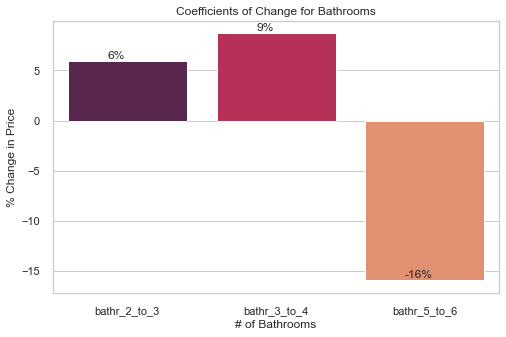

In [125]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = bathrooms.index, y = bathrooms['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Bathrooms')
ax.set(xlabel='# of Bathrooms', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/3),
            y = height+.25,
            s = '{:.0f}%'.format(height)) 
plt.savefig('images/bathrooms.png')

**Houses with Conditions of 5 have higher prices.** Compared to houses with a condition of 1, houses with condition of 5 have an 18.5% higher price on average. This seems logical, as the nicer the condition of a house, the higher the asking price. By upgrading some of the fixtures and appliances in the home, a seller could increase its condition on the scale. Homes with a condition of 4 also have a price 9.8% higher on average, so there still could be value in trying to improve a home's condition, even if it cannot reach a 5 condition. 

In [126]:
conditions = coeff_df.loc[['condi_4', 'condi_5']]

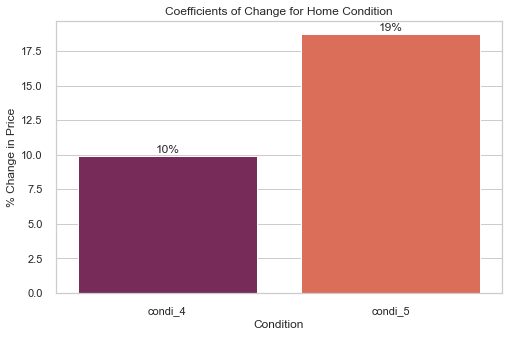

In [127]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = conditions.index, y = conditions['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Home Condition')
ax.set(xlabel='Condition', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/2.3),
            y = height+.25,
            s = '{:.0f}%'.format(height)); 
plt.savefig('images/conditions.png')

## Other Considerations

Our model had a final R-squared value of .74, meaning 74% of the variation in price is explained by the independent variables in our model. The RMSE value was approximately 160k, meaning our model usually comes within this amount of the home's actual price.

**Water.** Our model found that having a waterfront property coincides with the highest price percentage increase of all features--a house with water has a 52% higher price on average than one without. Since this is not a feature a seller can change about their property, we did not highlight it in our analysis.

**Basement.** Having a basement is another highly influential feature of housing prices, as houses with basements have a 16% higher price on average than houses without basements. Again, though, it would be very difficult for a seller to change the structure of their house to add a basement, so this feature also was not highlighted.

**6+ bedrooms.** Our model concluded that housees with more than 5 bedrooms have a 6% lower price on average. This isn't a very logical conclusion, and is likely due to our dataset not including enough houses with this feature. We would need to further explore homes of this size, and it may be useful to drop these homes from our dataset in the future. We run into a similar issue with 5-6 bathrooms, which is showing a 16% decrease in price on average.

**Location.** Location, whether zipcode or quadrant, also had a significant effect on price--living in quadrant 4 lowered price by 42% compared with houses in quadrant 1. However, a home seller cannot change the location of their current house. This information could be useful in a different context, for example, if location was unimportant to a buyer compared to the attributes of the house, the buyer could use this information to find a less expensive house in quadrant 4.

## Future Work

**Run a similar analysis for buyers.** As previewed in the location consideration above, parts of this model could be useful to buyers of homes trying to find the lowest price possible. The model could be further refined with buyers in mind, focusing on the features of a home the buyer is interested in, and which features they are willing to give up in order to obtain the best price. For example, if a buyer is price sensitive and does not need a basement, they may be better off targeting homes that do not have a basement, since they sell for 16% less on average.

**Further investigate the relationship between bedrooms and price.** In our final model, there was a negative relationship between price and bedrooms greater than 5. We would like to do further investigation into this to find out if it is a product of not having enough houses in our dataset with this many bedrooms, or if there is actually a negative affect on a home's price if there are too many bedrooms.